In [1]:
#Importing imporatnt python libraries
import pandas as pd
import numpy as np

#Model building
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Scaling features
from sklearn.preprocessing import scale



In [2]:
#Extracting 20% of train data
numbers_train = pd.read_csv("train.csv")

In [3]:
#Inspecting numbers train data set
numbers_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#inspecting dimensions of train data
print("Dimensions: ", numbers_train.shape, "\n")

Dimensions:  (42000, 785) 



In [5]:
#Inspecting data types of columns of train data
# data types
print(numbers_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [6]:
#Inspecting column names of train data
print(numbers_train.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [7]:
#Sorting number train data by label column
number_train_sorted = list(np.sort(numbers_train['label'].unique()))
print(number_train_sorted)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [8]:
#Inspecting mean of label data
numbers_train_means = numbers_train.groupby('label').mean()
numbers_train_means.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


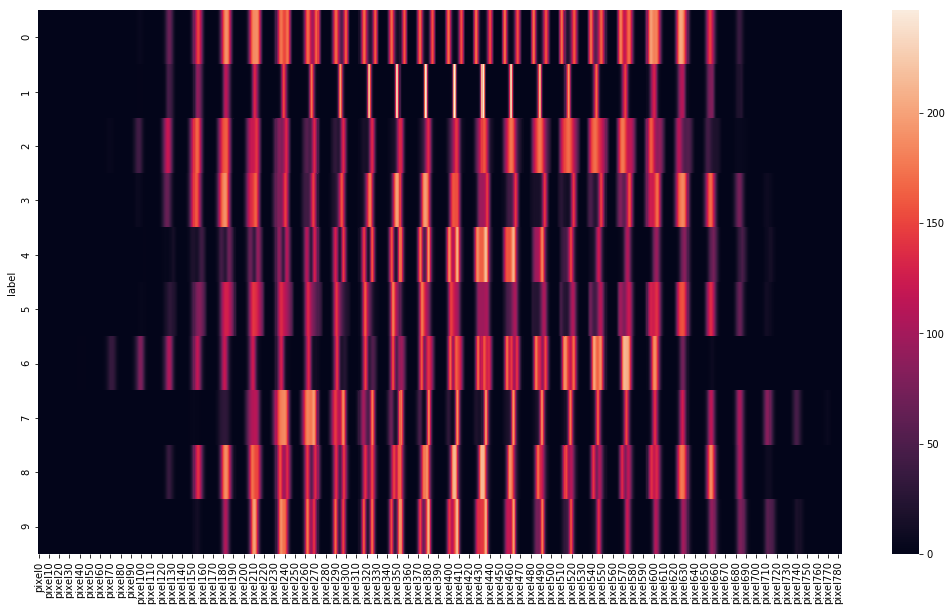

In [9]:
#Plotting heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(numbers_train_means)

In [10]:
#Data Preparation
# average feature values
round(numbers_train.drop('label', axis=1).mean(), 2)

#Here average varies slightly for all pixel columns so no missing inputs to fill

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In [11]:
#Splitting train data into X_train and Y_train for training model over it.
X_train = numbers_train.drop("label", axis = 1)
Y_train = numbers_train['label']

In [12]:
#Inspecting X_train
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Inspecting Y_train
Y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [14]:
# scaling the X_train data
X_train_scaled = scale(X_train)

In [15]:
#Inspecting scaled trained data set
X_train_scaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
#Performing a train test split for model building and evaluation
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_train_scaled, Y_train, test_size = 0.3, random_state = 101)

In [17]:
#First we have built a linear model with default parameters on training data

model_linear = SVC(kernel='linear')
model_linear.fit(X_train_m, y_train_m)

#Predicting label values for all test data points which we got from above test train split.
y_pred = model_linear.predict(X_test_m)

KeyboardInterrupt: 

In [18]:
#Inspecting confusion matrix and accuracy for above created linear model

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_m, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test_m, y_pred=y_pred))

#The linear model gives 91% of accuracy approx

accuracy: 0.917063492063492 

[[264   0   2   0   0   2   1   0   0   0]
 [  0 265   0   0   1   0   0   0   2   2]
 [  0   7 225   5   7   1   2   2   5   0]
 [  2   5   4 248   0   8   0   1   3   4]
 [  0   0   2   0 227   0   0   1   1  10]
 [  0   2   2  10   1 195   4   0   4   3]
 [  6   2   3   0   4   3 251   0   0   0]
 [  1   2   2   1   0   0   0 234   0  10]
 [  2   6   2  11   1  11   1   2 197   1]
 [  2   0   2   1  12   1   1  12   1 205]]


In [19]:
#Building a non linear model with randomly chosen hyperparameters
# non-linear model
# using rbf kernel, C=1, default value of gamma

# Building a model using rbf type kernel
non_linear_model = SVC(kernel='rbf')

# Fitting the non linear model created above on X_train_m and y_train_m
non_linear_model.fit(X_train_m, y_train_m)

# Predicting label for test data points 
y_pred = non_linear_model.predict(X_test_m)

In [20]:
# Inspecting confusion matrix and accuracy for non linear model built above

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test_m, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test_m, y_pred=y_pred))

#We can see that accuracy has increased from 91% to 93% approx by using non linear model.

accuracy: 0.9341269841269841 

[[262   0   4   1   0   1   0   0   1   0]
 [  0 264   2   0   1   0   1   0   1   1]
 [  0   2 237   3   3   0   1   2   6   0]
 [  0   2   8 254   0   4   0   1   5   1]
 [  0   0   2   0 229   1   0   0   1   8]
 [  0   2   6   7   2 198   5   0   0   1]
 [  5   0   6   0   3   2 253   0   0   0]
 [  1   1   7   0   0   0   0 232   0   9]
 [  1   1   7   6   0   4   0   0 212   3]
 [  2   0   4   5   4   0   0   8   1 213]]


In [ ]:
#Now building a non linear model with rbf kernel type and choosing variant range of hyperparameters (C and Gamma)
#Using Grid Search - Hyperparameter tunning
#Creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1,10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = 5,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_m, y_train_m)   

#For 20% of train data 5 jobs in parallel took close to 10-12 mins

In [42]:
# Inspecting final model cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,76.028705,0.983295,9.099544,0.478950,1,0.01,"{'C': 1, 'gamma': 0.01}",0.715136,0.749150,0.696429,...,0.716667,0.018910,12,0.999787,1.000000,0.999787,0.999787,1.000000,0.999872,0.000104
1,22.434733,0.369195,6.352363,0.040823,1,0.001,"{'C': 1, 'gamma': 0.001}",0.920068,0.926020,0.909014,...,0.917687,0.006141,5,0.974702,0.970451,0.973214,0.971301,0.973214,0.972577,0.001515
2,31.806654,0.499040,7.982947,0.198020,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.898810,0.897959,0.880952,...,0.891327,0.007838,8,0.906675,0.907526,0.910714,0.910077,0.908376,0.908673,0.001519
3,75.918763,0.519680,10.046651,0.036329,10,0.01,"{'C': 10, 'gamma': 0.01}",0.735544,0.763605,0.712585,...,0.735204,0.016668,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,18.814258,0.314576,5.407124,0.098666,10,0.001,"{'C': 10, 'gamma': 0.001}",0.929422,0.931973,0.919218,...,0.929932,0.005782,1,0.999362,0.999150,0.999150,0.999150,0.999575,0.999277,0.000170
5,9.577969,0.429043,4.282802,0.759864,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.918367,0.919218,0.911565,...,0.918367,0.003608,4,0.960034,0.959184,0.961522,0.958546,0.959821,0.959821,0.000997
6,74.840072,0.695680,9.681292,0.063166,100,0.01,"{'C': 100, 'gamma': 0.01}",0.735544,0.763605,0.712585,...,0.735204,0.016668,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,18.839185,0.259876,5.612979,0.072368,100,0.001,"{'C': 100, 'gamma': 0.001}",0.932823,0.930272,0.918367,...,0.929932,0.005955,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,10.539794,0.431685,3.709513,0.216941,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.914966,0.910714,0.911565,...,0.917007,0.005955,6,0.995536,0.995111,0.995111,0.994898,0.995323,0.995196,0.000217
9,66.152361,1.070613,5.675816,0.148756,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.735544,0.763605,0.712585,...,0.735204,0.016668,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


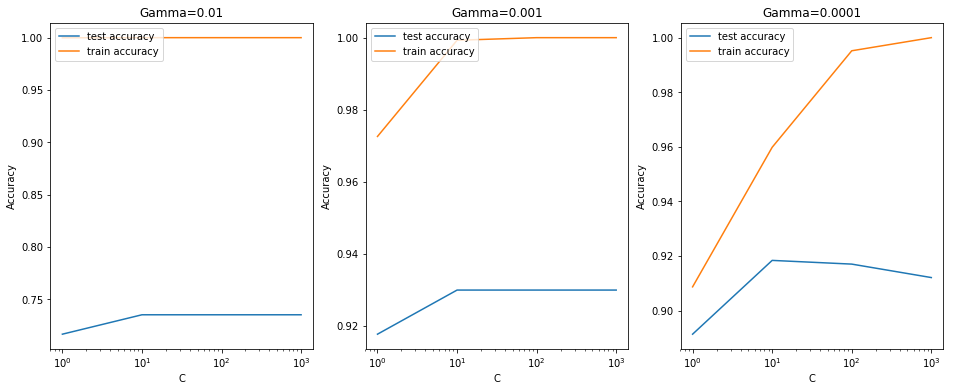

In [23]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# plotting C and gamma variance plots
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

#From below 3 plots we can clearly figure out that for Gamma = 0.001 and C=10 test_score and train_score line are close and depicts
#similar behavior

In [24]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9299319727891157 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


In [25]:
# Building a non linear model with optimal hyperparameters selected above.(C=10 and Gamma = 0.001)

# SVC model
model = SVC(C=10, gamma=0.001, kernel="rbf")

#Fitting model on train data set
model.fit(X_train_m, y_train_m)

#Predicting label values for all test data points
y_pred = model.predict(X_test_m)

# Accuracy metrics
print("accuracy", metrics.accuracy_score(y_test_m, y_pred), "\n")
print(metrics.confusion_matrix(y_test_m, y_pred), "\n")

#We can conclude here that model built with optimized/tuned hyperparameters (C=10 and gamma = 0.001) increases our
#accuracy from 93% to 94.24%.Although not significant but with 20% of data from train data set this holds good.

accuracy 0.9424603174603174 

[[263   0   6   0   0   0   0   0   0   0]
 [  0 264   2   0   1   0   0   0   1   2]
 [  0   3 237   3   3   0   1   2   5   0]
 [  0   3   7 258   0   2   0   1   3   1]
 [  0   0   2   0 230   1   1   0   0   7]
 [  0   2   4   5   2 205   2   0   1   0]
 [  6   1   5   0   1   2 254   0   0   0]
 [  1   1   5   1   1   0   0 237   0   4]
 [  2   1   6   8   0   4   0   0 210   3]
 [  2   0   4   3   4   0   0   7   0 217]] 



In [41]:
#Extracting 20% of test data to evaluate model built above on actual test data set
numbers_test = pd.read_csv("test.csv")

In [27]:
#Scaling test data points
numbers_test_scaled = scale(numbers_test)

In [39]:
#Predicting label (target variable here) values for all test data points
predictions = model.predict(numbers_test_scaled)

In [38]:
#Insecting predicted label entries.All values lie between 0-9 depicting the digit for each test data point
predictions

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [30]:
#Merging predicted label with test data frame corresponding to image Id.
numbers_test['label'] = predictions

In [31]:
#Inspecting final number test data set with label column at last
numbers_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [32]:
#Exporting final test data result to excel.
numbers_test.to_excel("TestData.xlsx")